# A guide to Seattle's Airbnb 
By your favourite data enthusiast,

*Surohit Tandon* 

## Table of Contents 
- [Introduction](#intro)
- [Introduction Summary and Project Questions](#introsum)
- [Part I - Cleaning](#Cleaning)
- [Part I - Cleaning Summary](#CleaningSummary)
- [Part II - Question1](#question1)
- [Part II - Question 2](#question2)
- [Part II - Question 1 & 2 Review](#question1Review)
- [Part II - Question 3](#question3)
- [Part II - Question 3 Review](#question3Review)

<a id='intro'></a>
### Introduction

So, what is this project about? Well, honestly, its just me having some fun with Airbnb's data. So, before I even begin to think about what questions I want to pose, I am going to dive into the data a bit to understand what questions naturally flow out of me. Below you will see a little bit of some EDA. Never fear, I will comment every code block so that we can take this journey together!!! 

To get into the mood, click [here](https://www.youtube.com/watch?v=WWe-azMWUjg).


Also, a link to the [dataset](https://www.kaggle.com/airbnb/seattle).

In [109]:
# Importing my basic libraries for the EDA 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Libraries I imported post EDA for other sections
from scipy.stats.stats import pearsonr
from scipy.stats import iqr
from sklearn.cross_validation import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Reading in our beautiful data using Pandas.read_csv 
calendar_df = pd.read_csv('seattle_data/calendar.csv')
listing_df = pd.read_csv('seattle_data/listings.csv')
review_df = pd.read_csv('seattle_data/reviews.csv')

In [3]:
# Ensuring all the data was read in correctly (This comment refers to the next two code blocks as well)
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Hmm, so it seems all the data is read in correctly. But its kinda hard to see whats going on in the listing dataframe. So lets dive a little deeper.

In [6]:
# Having a look at all the columns of the listing dataframe
list(listing_df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [7]:
# Looking at the data types that are present
listing_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [8]:
# Looking at the list of object data types we may want to convert to keep
list(listing_df.columns[listing_df.dtypes == object])

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

In [9]:
listing_df.shape

(3818, 92)

In [10]:
# Looking at the datatypes for each dataframes column 
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [11]:
review_df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [12]:
listing_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [13]:
# Looking at the number of columns
print ("The number of columns/features present in listing_df is {}".format(listing_df.shape[1]))
if listing_df.shape[1] > 40:
    print ("Jeeze thats a lot of columns...")
else: 
    print ("Hmm, not too bad")

The number of columns/features present in listing_df is 92
Jeeze thats a lot of columns...


So, thats a bucket load of features all packed into one dataset. What immediately caught my semi trained eye(s) were pricing and reveiw scores. This immediately starting to tingle the ML side of my brain and I immediately thought "ooooooo, predictive algorithms heheh" but it might be wise to take a step and begin by really evaluated all of the data together and see what are the best questions we could ask. ML ain't always the answer. Unfortunately.

Below we are going to have to have a look at how much missing data we have. I'm gonna start with the smaller data sets since it most likely going to be easier to build visualisations for and get a general sense. HERE WE GOOOOOOO


In [14]:
# Looking at nulls in the review table
review_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [15]:
# Looking at the most recent date for our review dataframe
review_df.date.max()

'2016-01-03'

In [16]:
# Reviewing the actual missing comments
review_df[review_df.comments.isnull()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN
35210,3554558,24863045,2015-01-03,24488791,Eleanor,NaN
37971,1790020,15640556,2014-07-13,16884291,Michael,NaN


In [17]:
# Seeing what percentage of the original dataframe these missing values represent
print ("The percentage of the original dataframe these values make up is {0:.3f}%".format(100*review_df.isnull().sum()[5]/review_df.shape[0]))
if 100*review_df.isnull().sum()[5]/review_df.shape[0]<0.05:
    print("Oh, this is a relatively insignifigant proportion of the data.")
else:
    print ("Oh damn, thats a big chunk")

The percentage of the original dataframe these values make up is 0.021%
Oh, this is a relatively insignifigant proportion of the data.


In [18]:
# Reviewing the nulls for the calendar dataframe
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [19]:
# Evaluating the dataframes null price rows
calendar_df[calendar_df.price.isnull()].tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


In [20]:
# Looking at the proportion of missing data with respect to the original datafram
print ("The percentage of the original dataframe these values make up is {0:1.0f}%".format(100*calendar_df.isnull().sum()[3]/calendar_df.shape[0]))
if 100*calendar_df.isnull().sum()[3]/calendar_df.shape[0]<0.05:
    print("Oh, this is a relatively insignifigant proportion of the data.")
else:
    print ("Oh damn, thats a big chunk")

The percentage of the original dataframe these values make up is 33%
Oh damn, thats a big chunk


In [21]:
# Looking at the total size of the dataframe for future reference
print("Our dataframe consists of {} rows".format(calendar_df.shape[0]))
print("If we dropped the missing values we would have {} rows left over".format(calendar_df.shape[0]-calendar_df.isnull().sum()[3]))

Our dataframe consists of 1393570 rows
If we dropped the missing values we would have 934542 rows left over


Now, lets consider our missing data in the calendar dataframe. There is definitely a SIGNIFIGANT chunk of missing data. Let's consider the operative word, SIGNIFIGANT. What does that mean? Well, it means its a pain in the butt to deal with. We could ignorantly drop the rows (or worse the column itself), but since the column is valuable and the rows with missing data makes a large chunk of our valuable column, we need to consider imputing some data. We have several options that I know of for this:

1. Using mode,median or means to fill missing rows (rather invaluable in our overall process)
2. Utlisiing ML to find missing values (Might work but since we have so many missing rows I feel this will lead to an over-generalisation in our model. We may be negating a huge population and variability in the data with this approach.)
3. Finally, creating dummy variables to track our missing data. I like this approach in this case as it still accounts for the missing data without any biasing.

Lets move on for now and look at the missing data in the listing dataframe. 

In [22]:
# Looking at columns with missing data
listing_df.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

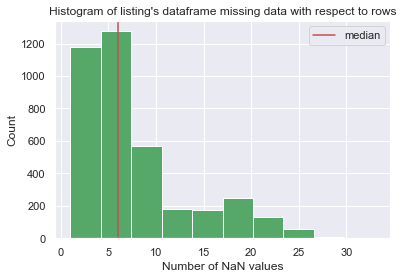

In [23]:
# Viewing the distribution of missing data
plt.hist(listing_df.isna().sum(axis=1),color='g')
plt.axvline(x=np.median(listing_df.isna().sum(axis=1)),color='r',label="median")
plt.legend()
title=("Histogram of listing's dataframe missing data with respect to rows")
plt.ylabel("Count")
plt.xlabel("Number of NaN values")
plt.title(title);

In [24]:
# Shape of our dataset
listing_df.shape

(3818, 92)

It seems there isn't that much missing data but honestly, the above means nothing to me. I think I want to see which columns contain missing data and then evaluate if I even want any of those columns or if I am happy to delete them from existance. So lets try that approach. 

In [25]:
# Determining the number of null columns 
(listing_df.isnull().sum() > 0).sum()

45

In [26]:
# Veiwing all the columns with missing data
list(listing_df.columns[listing_df.isnull().any()])

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [27]:
# Finding the number of numerical only column types
int_typ = (listing_df.dtypes == "int64").sum()
float_typ = (listing_df.dtypes == "float64").sum()
print ("So, the overall data set has {} columns. Since I know I wont be conducting any sentiment or text analysis".format(listing_df.shape[1]))
print ("I feel confident that we can drop our non-numerical data types")
print ("This would leave us with {} columns.".format(int_typ+float_typ))

So, the overall data set has 92 columns. Since I know I wont be conducting any sentiment or text analysis
I feel confident that we can drop our non-numerical data types
This would leave us with 30 columns.


In [28]:
# Checking the above list is the right size 
if (listing_df.isnull().sum() > 0).sum() == len(list(listing_df.columns[listing_df.isnull().any()])):
    print("Nice, we have the right list.")
else:
    print("Whoops")

Nice, we have the right list.


In [29]:
# Displaying which columns would be left for analysis
numbered_columns = list(listing_df.columns[(listing_df.dtypes == 'int64')]) + list(listing_df.columns[(listing_df.dtypes == 'float64')])
numbered_columns

['id',
 'scrape_id',
 'host_id',
 'accommodates',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'calculated_host_listings_count',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [30]:
# Finding the % missing for our new dataframe
listing_new = listing_df[numbered_columns]
listing_new.isnull().sum()/listing_new.shape[0]

id                                0.000000
scrape_id                         0.000000
host_id                           0.000000
accommodates                      0.000000
guests_included                   0.000000
minimum_nights                    0.000000
maximum_nights                    0.000000
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
availability_365                  0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
host_listings_count               0.000524
host_total_listings_count         0.000524
latitude                          0.000000
longitude                         0.000000
bathrooms                         0.004191
bedrooms                          0.001572
beds                              0.000262
square_feet                       0.974594
review_scores_rating              0.169460
review_scores_accuracy            0.172342
review_scor

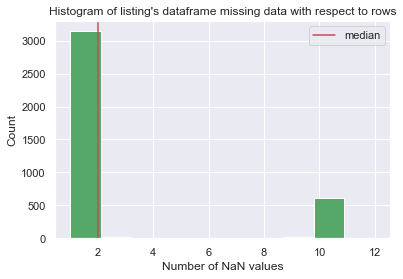

In [31]:
# Viewing the distribution of missing data
plt.hist(listing_new.isna().sum(axis=1),color='g')
plt.axvline(x=np.median(listing_new.isna().sum(axis=1)),color='r',label="median")
plt.legend()
title=("Histogram of listing's dataframe missing data with respect to rows")
plt.ylabel("Count")
plt.xlabel("Number of NaN values")
plt.title(title);

<a id='introsum'></a>
### Introduction Summary and Project Questions

So what can we take away from our little dive into the data?
- Well, we know we that we have to impute values for our calendar dataframe
- Our can drop the missing rows in our review column
- We are going to drop non numeric values in our listing dataframe. I am taking a huge assumption that our object columns are not neccessary for analysis. I would go through each column to further understand if we could manipulate these columns for analysis but due to the lack of data insight (a data dictionary would be of tremoundous assisstance) and my general time sensitivity with regards to this project I will drop these columns. 
- With our new listing dataframe we also need to consider the number of missing values in each row before we impute any values. It seems we have two columns with primarily no data in it that we will have to drop. The rest have less than 20% missing data and therefore we may get away with simply imouting mean/modal values. 
- **A TWIST** : It also seems that our review dataset has data that is older and not relavent to our other dataframes (for a time series analysis) This may render this dataset somewhat useless unless we wanted to do a deep look into the reviews of houses 

Okay, so. Questions. This is *arguably the hardest part* of this little project but here goes. 

1. How often are residences typically ocuppied? How does this vary with price?
2. Which are the key relationships that help to predict our review scores? 
3. Can we predict if a house will receive a 'good' score?






<a id='Cleaning'></a>
## Part I - Cleaning 

Lets condense what we need to clean below:

- Remove columns with too many missing rows in listing dataframe
- Impute the rest of the missing values in the listing dataframe using average measures
- Dropping null values from review dataframe
- Impute calendar dataframe with a "missing values" column for the price feature
- Once all datasets are cleaned, we can combine(merge) the calendar and listing dataframe

As we all know, data analysis can be a very iterative purpose. These are all of my initial considerations. There may be more that arise in which case I will append those points below. 

- Realised we need to change variable types in calendar dataframe for the price column 
- Also, we need to create dummy variables for the "available" feature
- We may also want to remove the date columns or convert them to another format for analysis (currently in object formats)

In [32]:
# Looking at the list of columns that had a lot of missing data 
list(listing_new.columns[listing_new.isnull().sum()/listing_new.shape[0]>0.3])

['square_feet', 'license']

In [33]:
# Compiling a list of columns we want to drop
dropping = list(listing_new.columns[listing_new.isnull().sum()/listing_new.shape[0]>0.3])
# Removing columns in listing dataframe 
listing_new.drop(dropping, axis=1, inplace=True)
# new dataframe ensuring our dataframe has 2 less columns since we wanted to drop 2 columns 
if listing_new.shape[1] == 30-2:
    print("We have the correct shape!")

We have the correct shape!


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


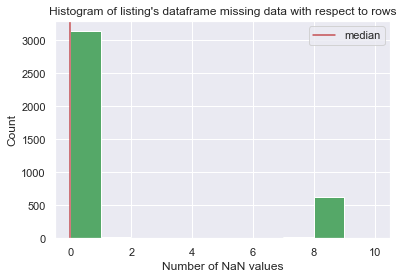

In [34]:
# RE-viewing the distribution of missing data
plt.hist(listing_new.isna().sum(axis=1),color='g')
plt.axvline(x=np.median(listing_new.isna().sum(axis=1)),color='r',label="median")
plt.legend()
title=("Histogram of listing's dataframe missing data with respect to rows")
plt.ylabel("Count")
plt.xlabel("Number of NaN values")
plt.title(title);

In [35]:
# Finding all the columns that need imputing
impute_list = list(listing_new.columns[listing_new.isna().sum()/listing_new.shape[0]>0])
impute_list

['host_listings_count',
 'host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [36]:
# Exploring some averages averages
listing_new.describe()

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3812.000000,3817.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,3.349398,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,...,1.307712,1.735394,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,1.977599,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,...,0.883395,1.139480,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,2.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,...,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,3.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,...,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,4.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,...,2.000000,2.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,16.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,...,7.000000,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


In [37]:
# Imputing the means for each feature
for im in impute_list:
    listing_new[im].fillna(listing_new[im].mean(),inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:
# Checking we dont have any nulls
if listing_new.isnull().any().sum() == 0:
    print("We have filled our dataset!")

We have filled our dataset!


In [39]:
# dropping our null comments rows
review_new = review_df[review_df.comments.isnull() == False]

In [40]:
# Converting the date to datetime
review_new['date'] =  pd.to_datetime(review_new['date'], infer_datetime_format= True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
# Checking conversion
review_new.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [42]:
# Checking we removed the rows
review_new.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [43]:
# Looking at all the values in our dataframe
calendar_df.price.value_counts(dropna=False)

NaN        459028
$150.00     36646
$100.00     31755
$75.00      29820
$125.00     27538
$65.00      26415
$90.00      24942
$95.00      24327
$99.00      23629
$85.00      23455
$80.00      19817
$110.00     19454
$120.00     19145
$70.00      18439
$60.00      18004
$175.00     17707
$250.00     16870
$55.00      16864
$200.00     16144
$50.00      15978
$115.00     14775
$40.00      13357
$69.00      12922
$135.00     11455
$105.00     11062
$130.00     11008
$89.00      10355
$79.00      10133
$225.00      8163
$45.00       8134
            ...  
$616.00         1
$527.00         1
$567.00         1
$603.00         1
$683.00         1
$637.00         1
$788.00         1
$562.00         1
$636.00         1
$784.00         1
$733.00         1
$560.00         1
$685.00         1
$625.00         1
$654.00         1
$668.00         1
$722.00         1
$711.00         1
$624.00         1
$524.00         1
$708.00         1
$451.00         1
$794.00         1
$517.00         1
$743.00   

In [44]:
# Creating a dummy dataframe
dummy_data = pd.get_dummies(calendar_df['price'], dummy_na = True)
dummy_data.head()

,"$1,000.00","$1,099.00","$1,199.00","$1,240.00","$1,250.00","$1,450.00","$1,650.00",$10.00,$100.00,$101.00,...,$94.00,$95.00,$950.00,$96.00,$97.00,$975.00,$98.00,$99.00,$999.00,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Dropping all the rows except for our nan column
dummy_data.drop(list(dummy_data.columns)[:-1],axis=1, inplace = True)
dummy_data.head()

,nan
0,0
1,0
2,1
3,1
4,1


In [46]:
# Appending nan column to our original calendar dataframe
df_calendar_merged = calendar_df.merge(dummy_data, how='outer', left_index=True, right_index=True)

In [47]:
# Checking we correctly merged the data
df_calendar_merged.head()

,listing_id,date,available,price,nan
0,241032,2016-01-04,t,$85.00,0
1,241032,2016-01-05,t,$85.00,0
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [48]:
# Had issues accessing the nan column, so decided to rename it manually
some = list(df_calendar_merged.columns) 
some[4] = 'NaN'

In [49]:
# Checking our list is correct
some

['listing_id', 'date', 'available', 'price', 'NaN']

In [50]:
# Reassigning our column names
df_calendar_merged.columns = some

In [51]:
# Checking our column names came out right
df_calendar_merged.columns

Index(['listing_id', 'date', 'available', 'price', 'NaN'], dtype='object')

In [52]:
# Checking our datatypes worked
df_calendar_merged.dtypes

listing_id     int64
date          object
available     object
price         object
NaN            uint8
dtype: object

In [53]:
# converting our NaN column to an integer column 
df_calendar_merged.NaN = df_calendar_merged['NaN'].astype('int64', copy=False)

In [54]:
# Checking we correctly converted our columns 
df_calendar_merged.dtypes

listing_id     int64
date          object
available     object
price         object
NaN            int64
dtype: object

In [55]:
# Removing the $ and , signs
df_calendar_merged.price = df_calendar_merged.price.str.replace('$', '')
df_calendar_merged.price = df_calendar_merged.price.str.replace(',', '')

In [56]:
# Checking the above worked 
df_calendar_merged.price.head()

0    85.00
1    85.00
2      NaN
3      NaN
4      NaN
Name: price, dtype: object

In [57]:
# converting our price column to an integer column 
df_calendar_merged.price = df_calendar_merged['price'].astype('float64', copy=False)

In [58]:
# Checking the conversion worked
df_calendar_merged.dtypes

listing_id      int64
date           object
available      object
price         float64
NaN             int64
dtype: object

In [59]:
# Imputing the mean
df_calendar_merged['price'].fillna(df_calendar_merged['price'].mean(),inplace=True)

In [60]:
# Ensuring the mean was imputed 
df_calendar_merged['price'].head()

0     85.000000
1     85.000000
2    137.944859
3    137.944859
4    137.944859
Name: price, dtype: float64

In [61]:
# Converting the date to datetime
df_calendar_merged['date'] =  pd.to_datetime(df_calendar_merged['date'], infer_datetime_format= True)

In [62]:
# Checking the above worked
df_calendar_merged.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
NaN                    int64
dtype: object

In [63]:
# Double check to ensure we dont have any NaN's in our available column 
df_calendar_merged.available.value_counts(dropna=False)

t    934542
f    459028
Name: available, dtype: int64

In [64]:
# Creating a dummy dataframe
dummy_avail = pd.get_dummies(df_calendar_merged['available'])
dummy_avail.head()

,f,t
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [65]:
# Appending avail columns to our original calendar dataframe
df_calendar_merged = df_calendar_merged.merge(dummy_avail, how='outer', left_index=True, right_index=True)
# Checking the merge
df_calendar_merged.head()

,listing_id,date,available,price,NaN,f,t
0,241032,2016-01-04,t,85.000000,0,0,1
1,241032,2016-01-05,t,85.000000,0,0,1
2,241032,2016-01-06,f,137.944859,1,1,0
3,241032,2016-01-07,f,137.944859,1,1,0
4,241032,2016-01-08,f,137.944859,1,1,0


In [66]:
# Dropping our available column
df_calendar_merged.drop(['available'],axis=1,inplace=True)
# Checking the drop worked
df_calendar_merged.head()

,listing_id,date,price,NaN,f,t
0,241032,2016-01-04,85.000000,0,0,1
1,241032,2016-01-05,85.000000,0,0,1
2,241032,2016-01-06,137.944859,1,1,0
3,241032,2016-01-07,137.944859,1,1,0
4,241032,2016-01-08,137.944859,1,1,0


In [67]:
# Renaming for neatness
df_calendar_merged.rename(index=str, columns={"f": "available_f", "t": "available_t"},inplace=True)
# checking the new names
df_calendar_merged.head()

,listing_id,date,price,NaN,available_f,available_t
0,241032,2016-01-04,85.000000,0,0,1
1,241032,2016-01-05,85.000000,0,0,1
2,241032,2016-01-06,137.944859,1,1,0
3,241032,2016-01-07,137.944859,1,1,0
4,241032,2016-01-08,137.944859,1,1,0


In [68]:
# converting our avail columns to an integer column 
df_calendar_merged.available_f = df_calendar_merged['available_f'].astype('int64', copy=False)
df_calendar_merged.available_t = df_calendar_merged['available_t'].astype('int64', copy=False)

In [69]:
# checking the new names
df_calendar_merged.dtypes

listing_id              int64
date           datetime64[ns]
price                 float64
NaN                     int64
available_f             int64
available_t             int64
dtype: object

In [70]:
# Final checks before we conduct any merges
review_new.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [71]:
# Final checks before we conduct any merges
listing_new.head()

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,20160104002432,956883,4,2,1,365,14,41,71,...,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,...,1.0,1.0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,...,5.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,...,0.0,2.0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,...,3.0,3.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000


In [72]:
# a quick second look at the number of rows before we merge
print ("We have {} rows in our calendar dataset and {} rows in our listing dataset".format(df_calendar_merged.shape[0],listing_new.shape[0]))

We have 1393570 rows in our calendar dataset and 3818 rows in our listing dataset


In [73]:
# Merging our listing_new and df_calendar_merged dataframes!!!
final_df = df_calendar_merged.merge(listing_new, how='outer', left_on='listing_id', right_on='id')

In [74]:
# making sure we didnt join resulting in NaNs
final_df.isna().sum()

listing_id                        0
date                              0
price                             0
NaN                               0
available_f                       0
available_t                       0
id                                0
scrape_id                         0
host_id                           0
accommodates                      0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
calculated_host_listings_count    0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
bathrooms                         0
bedrooms                          0
beds                              0
review_scores_rating              0
review_scores_accuracy      

In [75]:
# checking our dtypes are all gucci
final_df.dtypes

listing_id                                 int64
date                              datetime64[ns]
price                                    float64
NaN                                        int64
available_f                                int64
available_t                                int64
id                                         int64
scrape_id                                  int64
host_id                                    int64
accommodates                               int64
guests_included                            int64
minimum_nights                             int64
maximum_nights                             int64
availability_30                            int64
availability_60                            int64
availability_90                            int64
availability_365                           int64
number_of_reviews                          int64
calculated_host_listings_count             int64
host_listings_count                      float64
host_total_listings_

<a id='CleaningSummary'></a>
## Part I - Cleaning Summary

WOW. That was a lot. But hey, we did it, right?.. right?

Moving on, lets take a look at our actual questions. We should be in a good position to analyze our data set and try to evaluate these questions. I'm going to seperate them into their own individual parts so that we can tackle each question on their own. Below we can review the questions:

1. How often are residences typically ocuppied? How does this vary with price?
2. Which are the key relationships that help to predict our review scores? 
3. Can we predict if a house will receive a 'good' score?


**So, lets begin with question 1.**

<a id='question1'></a>
## Part II - Question 1
so, *How often are residences typically ocuppied? How does this vary with price?*. Let's break this down.

- We want to know what the distribution for occupation in an air bnb is and where our averages lay on this distribution. So, I'm thinking, a histogram should suffice for the first part. 
- Next, we want to look at if there is any relationship with occupation and price. We may want to check for any correlation using a scatter plot and RSE. We could also bucket our price spent into ranges and then find the averages for time spent within each range and plot this in a bar chart. This will essentially give us an idea of *property utlization* (ocupancy rates) accross price ranges.

So, we know have an approach for this question. Let's try to execute.


In [76]:
# Looking at the columns we need
list(final_df.columns)

['listing_id',
 'date',
 'price',
 'NaN',
 'available_f',
 'available_t',
 'id',
 'scrape_id',
 'host_id',
 'accommodates',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'calculated_host_listings_count',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

Hmm, since we dont have explicit information on how long each listing is ocuppied for per occupation. We may be able to replace this with "Reviews per month" assuming a constant review rate across all houses. Our reviews per month give us a utilization rate of each property per month. 

**Assumptions**: 
- Everyone who rents an air bnb fills out a review
- Each stay has approximatley the same duration across all reviews (A hugely unlikely scenario but I am unsure of how to account for this). 

The reason I didnt go with the available columns is that a residence may be unavailable due to reasons other than being occupied... *oooh look at that domain interpretation*. 

In [77]:
# Looking at the time the data set spans over
print ("We begin this data set at {} and end at {}".format(min(final_df.date),max(final_df.date)))

We begin this data set at 2016-01-04 00:00:00 and end at 2017-01-02 00:00:00


In [78]:
# Viewing our reviews column
final_df.reviews_per_month.describe()

count    1.393570e+06
mean     2.078919e+00
std      1.665746e+00
min      2.000000e-02
25%      8.300000e-01
50%      2.000000e+00
75%      2.660000e+00
max      1.215000e+01
Name: reviews_per_month, dtype: float64

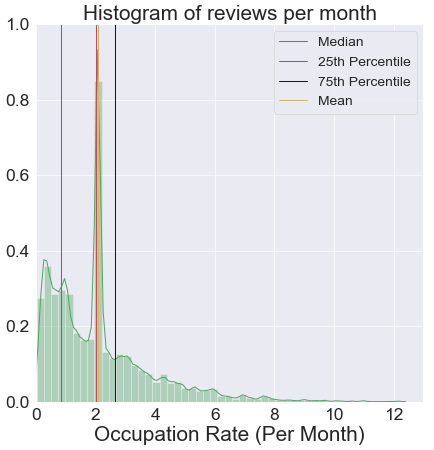

In [79]:
# Viewing our reviews per month with avaerage measures
plt.figure(figsize=(10, 10), dpi= 50, facecolor='w', edgecolor='k')
ax = sns.distplot(final_df.reviews_per_month, bins=50, kde=True, color="g")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.axvline(final_df.reviews_per_month.median(),color='r', label = "Median")
plt.axvline(final_df.reviews_per_month.describe()[4], label = "25th Percentile")
plt.axvline(final_df.reviews_per_month.describe()[6], label = "75th Percentile", color='k')
plt.axvline(final_df.reviews_per_month.mean(), color='y', label ="Mean")
plt.legend(fontsize=20)
plt.xlim(0,13)
plt.ylim(0,1)
plt.xlabel('Occupation Rate (Per Month)', size=30)
plt.title("Histogram of reviews per month", size=30);

We seem to have two peaks within this data set. This may identify two potential clusters within our data if we considered a guassian mixture model. But this would come way later. For now, we can identify that the data set is clearly skewed to the right (even if there isnt a large gap between our mean and median) and that it clearly follows a non-normal distribution.

In [80]:
print ("The IQR of our occupation rate is {}".format(iqr(final_df.reviews_per_month)))

The IQR of our occupation rate is 1.83


So, to answer the 1st part of our question. Residences are often occupied between 1 and 3 times per month in Seattle. We do seem to have values close to or about 0 since our reviews_per_month column seems to have been calculated through aggragating down from year to month since having less that 1 review per month makes no sense (divided by 12). 

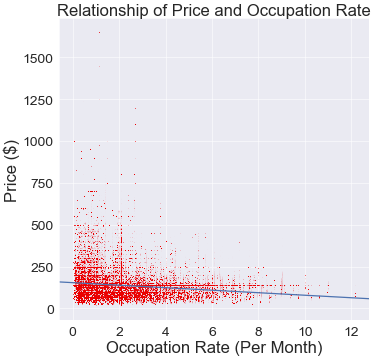

In [81]:
# Creating a scatter plot to view any potential relationship
plt.figure(figsize=(10, 10), dpi= 40, facecolor='w', edgecolor='k')
ax = sns.regplot(y="price", x="reviews_per_month", fit_reg=True ,data=final_df,
        scatter_kws={"s": 3, "alpha": 0.003, "color": "red"})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.title('Relationship of Price and Occupation Rate', size = 30)
plt.ylabel('Price ($)', size = 30)
plt.xlabel('Occupation Rate (Per Month)', size = 30);

It is rather difficult to see too much of a relationship across this plot. While the trendline seems to be negative we may benifit from aggragating our data into "buckets" and analyzing again.

**Note**: It is difficult to inteperate our data due to the noise that is clearly prevalent. 

In [82]:
# Compiling a simple function to bucket our reviews into a new variable
def review_buck(x):
    if x>0 and x<2:
        return 1
    if x>=2 and x<4:
        return 3
    if x>=4 and x<6:
        return 5
    if x>=6 and x<8:
        return 7
    if x>=8 and x<10:
        return 9
    if x>=10 and x<12:
        return 11
    else:
        return 13
# Creating our new variable 
final_df['review_bucket'] = final_df.reviews_per_month.apply(review_buck)

In [83]:
# Looking at where most of our data lies
final_df.review_bucket.value_counts()

1     684740
3     539105
5     122275
7      36135
9       8760
11      2190
13       365
Name: review_bucket, dtype: int64

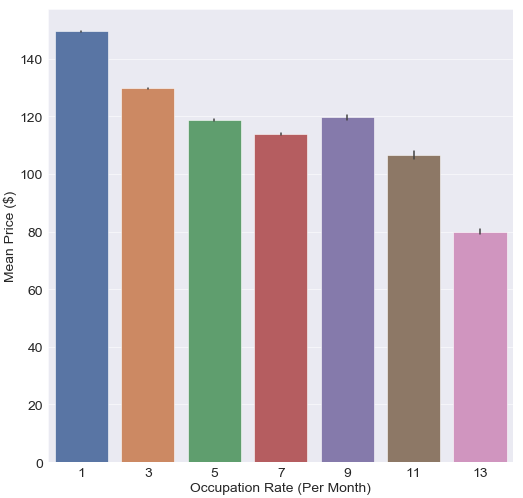

In [84]:
# Creating a smoother visual for between price and occupancy rate
plt.figure(figsize=(15, 15), dpi= 40, facecolor='w', edgecolor='k')
ax = sns.barplot(x="review_bucket", y="price", data=final_df)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.ylabel('Mean Price ($)', fontsize = 25)
plt.xlabel('Occupation Rate (Per Month)' , fontsize = 25);

We can see a spark disparity between the price of frequently occupied (>11) and rarely occupied (<3). 

**Note**: It is important to note we have a lack of data in the higher occupation rate buckets which makes it a difficult comparison to interpret.

In [85]:
# Calculating the Pearson correlation coefficient between our two variables
print("The Pearson r correlation coefficient between price and and occupation rate is {0:.4f}%.".format(pearsonr(final_df.reviews_per_month,final_df.price)[0]))
print("The p value for this is {}.".format(pearsonr(final_df.reviews_per_month,final_df.price)[1]))

The Pearson r correlation coefficient between price and and occupation rate is -0.1454%.
The p value for this is 0.0.


<a id='question2'></a>
## Part II - Question 2
so, *Which are the key relationships that help to predict our review scores? *.

The approach for this question is rather straightforward. We can create a clean visual by displaying a seaborn heatmap to try and pick out the clear variables affecting our review scores.

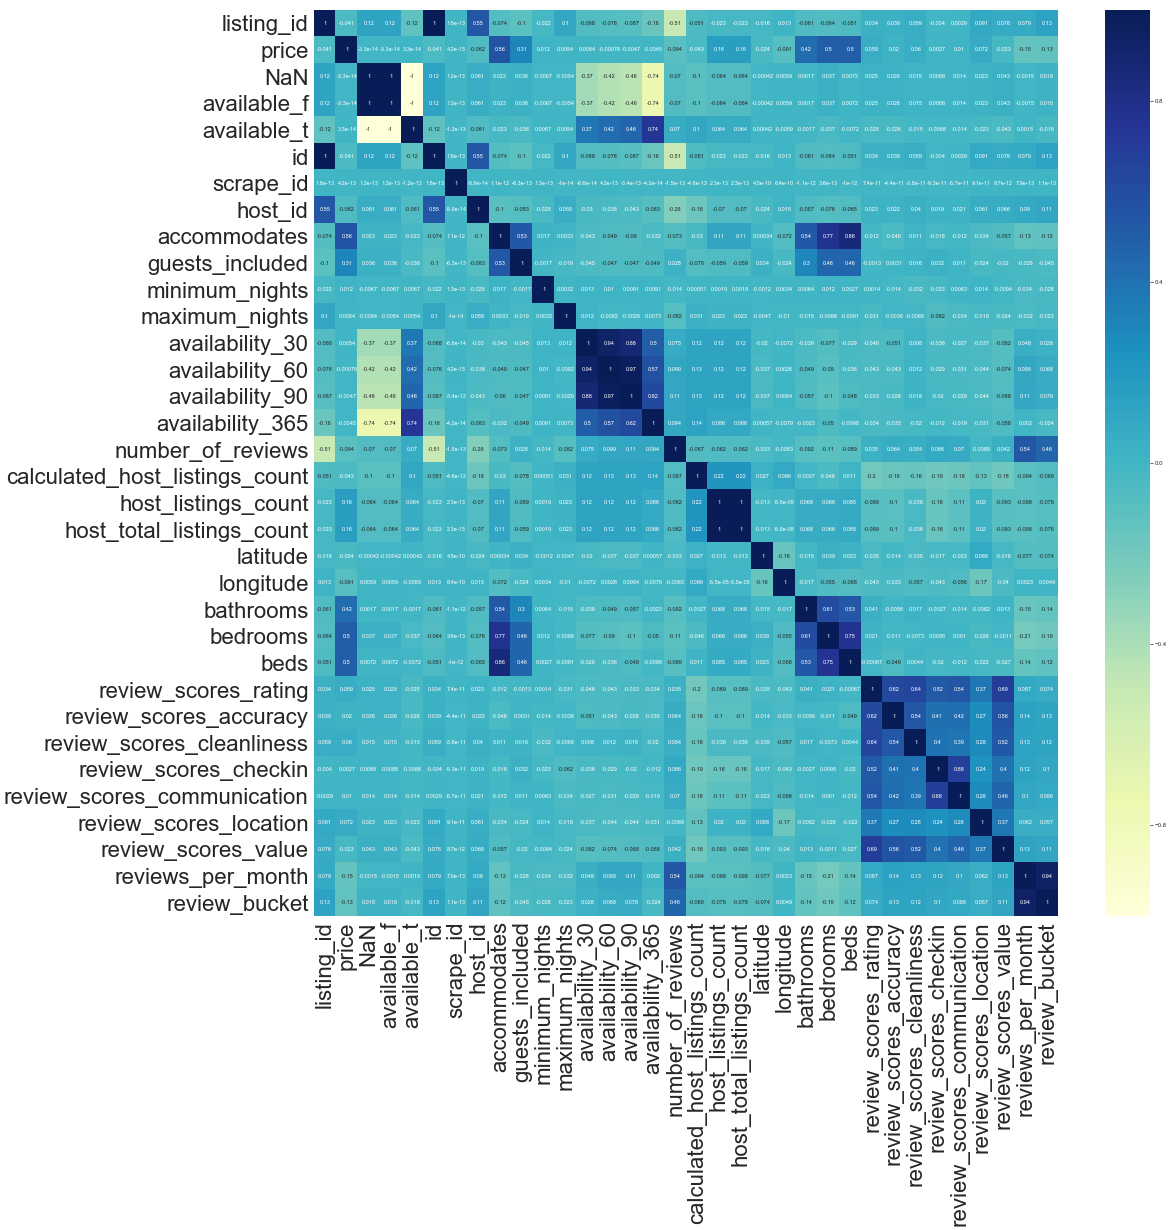

In [86]:
# Creating a correlation matrix to identify any potential relationships
corr = final_df.drop('date', axis=1).corr()
plt.figure(figsize=(30, 30), dpi= 40, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr,annot=True, cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(40);

- We can see some obvious clusters of colinearity between variables. For instance, all of our review scores relate to each other which makes obvious sense. Also, our bathrooms, bedrooms and beds display a similar degree of colinearity. This may be vital if we decide to create a ML algorithm as they could inflate our variance. 
- We can see though, that price seems to be more influenced by the beds and acomodation than any other metric. 

<a id='question1Review'></a>
## Part II - Question 1 & 2 Review

So, did we answer our question: *How often are residences typically ocuppied? How does this vary with price?*. 

- The majority of our data seems to lie between the 1 and 3 occupancies per month (our IQR value was approx 1.83). 
- With regards to the relationship to price, we dont see a particularly strong relationship. While it was fair to assume the relationship would be negatively correlated, its strength is well below what I had personally expected. This lead us to believe that occupation rate is not likely primary predictor of price. 

Now, let us focus on *Which are the key relationships that help to predict our review scores?*.

- So it is clear that there seems to be a high degree of colinearity between all the review scores which makes sense considering that if the overall experience was positive then most of the reveiw scores would be positive and vice versa. 

- Apart from the other review scores that seem to be clustered together in our heatmap, there are no real key predictors that we can identify for our review scores. 


<a id='question3'></a>
## Part II - Question 3
so, *Can we predict if a house will receive a 'good' score?*. Let's break this down.

- Our first step is to determine a "bad review".
- Then, we need to split our data from features and our target variable
- Then, we need a test train split
- Finally, we can try to build a model to see if we can accurately preduct if a house will get a good or bad review

So, we know have an approach for this question. Let's try to execute.

In [87]:
# Lets begin by creating a new dataframe without certain unnecesary columns
df = final_df.drop(['date','review_bucket','listing_id'],axis=1)

In [88]:
# Checking we correctly dropped the columns in our new dataframe
list(df.columns)

['price',
 'NaN',
 'available_f',
 'available_t',
 'id',
 'scrape_id',
 'host_id',
 'accommodates',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'calculated_host_listings_count',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [89]:
# Creating an aggregated target variable
df['review_score'] = (df['review_scores_rating']/10+df['review_scores_accuracy']+df['review_scores_cleanliness']+
                     df['review_scores_checkin']+df['review_scores_communication']+
                     df['review_scores_location']+df['review_scores_value'])/7
df.head()

,price,NaN,available_f,available_t,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,...,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_score
0,85.000000,0,0,1,241032,20160104002432,956883,4,2,1,...,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,9.785714
1,85.000000,0,0,1,241032,20160104002432,956883,4,2,1,...,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,9.785714
2,137.944859,1,1,0,241032,20160104002432,956883,4,2,1,...,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,9.785714
3,137.944859,1,1,0,241032,20160104002432,956883,4,2,1,...,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,9.785714
4,137.944859,1,1,0,241032,20160104002432,956883,4,2,1,...,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,9.785714


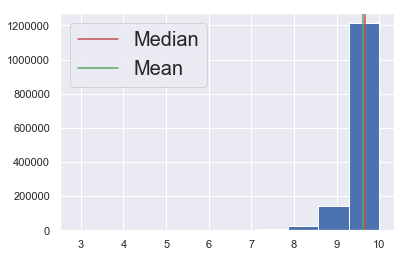

In [90]:
# Understanding our distribution of scores before setting a "bad score"
df.review_score.hist()
plt.axvline(df.review_score.median(),color='r', label = "Median")
plt.axvline(df.review_score.mean(),color='g', label = "Mean")
plt.legend(fontsize=20);

In [91]:
# Looking at the values present in our review scores
df.review_score.value_counts()

9.614884     236155
10.000000    189070
9.971429      66065
9.857143      47085
9.985714      41610
9.800000      39420
9.814286      38325
9.957143      36500
9.714286      33945
9.785714      30295
9.942857      28835
9.828571      28470
9.428571      25550
9.642857      24090
9.928571      21170
9.628571      20805
9.657143      20440
9.485714      18980
9.471429      17155
9.142857      17155
9.771429      17155
9.614286      16425
9.671429      15695
9.500000      14965
9.571429      14235
9.442857      12045
9.285714      12045
9.328571      11680
9.457143      11315
9.685714      10950
              ...  
7.328571        365
6.142857        365
7.828571        365
8.471429        365
8.028571        365
6.285714        365
6.785714        365
7.100000        365
7.471429        365
9.921749        365
9.519485        365
9.407180        365
7.085714        365
7.228571        365
7.000000        365
7.942857        365
7.257143        365
6.000000        365
8.171429        365


In [92]:
# In the case of supervised models, we're going to want our score to be our target variable
# We also want to split our data into training and testing sets
df_train = df.drop([ 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_score'], axis=1)
df_score = df['review_score']

In [93]:
# Lets transform our review_score so that below the mean represents a "bad" score, and above the mean is a "good" score
mean = df.review_score.mean()
# Encoding the 'income_raw' data to numerical values
score = df_score.apply(lambda x: 1 if x > mean else 0)

In [94]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train, 
                                                    score, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1114856 samples.
Testing set has 278714 samples.


Below, I am going to try several different classifiers and evaluate them to see how they perform.

In [108]:
# Running an AdaBoost classifier on our data
ada_mod = AdaBoostClassifier(n_estimators=100, learning_rate=0.2)

# Fit our model to the training data
ada_mod.fit(X_train, y_train)

# Predict on the test data
predictions = ada_mod.predict(X_test)

# Score our model
print('Accuracy score: ', format(accuracy_score(y_test, predictions.round())))
print('Precision score: ', format(precision_score(y_test, predictions.round())))
print('Recall score: ', format(recall_score(y_test, predictions.round())))
print('F1 score: ', format(f1_score(y_test, predictions.round())))

Accuracy score:  0.7215819800942902
Precision score:  0.7178652853521076
Recall score:  0.9987008241646705
F1 score:  0.8353102722296858


Hmm. We could parameter tune our model but I feel a different model would preform better. 

In [105]:
# Define the classifier, and fit it to the data
modelTree = DecisionTreeClassifier()
modelTree.fit(X_train, y_train)
# Making predictions
y_test_pred = modelTree.predict(X_test)

# Calculate the accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred)))
print('Precision score: ', format(precision_score(y_test, y_test_pred)))
print('Recall score: ', format(recall_score(y_test, y_test_pred)))
print('F1 score: ', format(f1_score(y_test, y_test_pred)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


Wow, seems like we have a winner. Can't beat those scores. 

<a id='question3Review'></a>
## Part II - Question 3 Review

so, did *Can we predict if a house will receive a 'good' score?*. Well, we didn't ofcourse. But, our model did! To an extremely high degree of accuracy too.

When we consider the number of unique values of scores and their distribution compared to the size of our data set we can see a huge disparity. All of our scores lay between 8 and 10 and we only had 166 unique values with a dataset of over 1 million points! This may be a large contributing reason as to why our Decision Tree classifier well outperformed our ada boost model. The defualt Decision tree classifier runs till there is a minimum split of 2 samples with a minimum of 1 sample on each leaf. 

While the ada boost model may seem like a different ml model its actually extremely similar to our decision tree model. Why are the scores so different then, you ask? Well, our Ada Boost model is utlizing a bunch of week learners with a max tree depth of only 1!! The number of these estimators are set to 50 and it may explain the poor model output. I'm sure with some tuning we could improve the ensemble method but I feel that would simply be a proof of concept and if you're reading this, that could be a fun challenge for yourself!!

